## Computing hypervolume

In [2]:
import botorch
import gpytorch
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.figure import figaspect
from tqdm.notebook import tqdm

plt.style.use("bmh")
plt.rc("figure", figsize=figaspect(3 / 4))

torch.manual_seed(0);

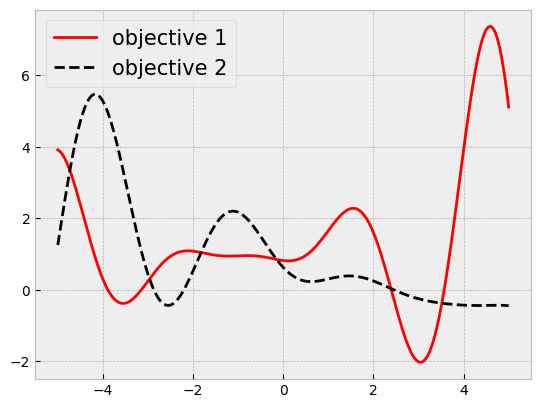

In [9]:
def objective1(x):
    # a modification of https://www.sfu.ca/~ssurjano/forretal08.html
    y = -((x + 1) ** 2) * torch.sin(2 * x + 2) / 5 + 1 + x / 20
    return y


def objective2(x):
    return (0.1 * objective1(x) + objective1(x - 4)) / 3 - x / 3 + 0.5


def joint_objective(x):
    y1 = objective1(x)
    y2 = objective2(x)

    return torch.vstack([y1.flatten(), y2.flatten()]).transpose(-1, -2)


lb = -5
ub = 5

bounds = torch.tensor([[lb], [ub]], dtype=torch.float)

xs = torch.linspace(lb, ub, 201)
ys = joint_objective(xs)

plt.plot(xs, ys[:, 0], label="objective 1", c="r")
plt.plot(xs, ys[:, 1], "k--", label="objective 2")

plt.legend(fontsize=15);

In [10]:
from botorch.utils.multi_objective.box_decompositions.dominated import (
    DominatedPartitioning,
)

In [11]:
n = 20
torch.manual_seed(0)
train_x = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(n, 1)
train_y = joint_objective(train_x)

In [12]:
ref_point = torch.tensor([train_y[:, 0].min(), train_y[:, 1].min()])

dominated_part = DominatedPartitioning(ref_point=ref_point, Y=train_y)
volume = dominated_part.compute_hypervolume().item()

volume

25.5462703704834